In [ ]:
#Baixar a biblioteca que faz os graficos de vela
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
#importando as bibliotecas
import pandas as pd
import seaborn as sns
from datetime import datetime
#import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import cufflinks as cf
cf.set_config_file(offline=True)
import mplfinance as mpf
%matplotlib inline

In [ ]:
#Definindo o csv
dados = pd.read_csv('Bitcoin Histórico _ Dados e Evolução BTC - Investing.com (2).csv')
url='https://drive.google.com/file/d/15fUX6gtAaqKyT-de0iqQQjkdJsboF_MC/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dfSemanal = pd.read_csv(dwn_url, sep=',', engine='python', decimal='.')\
                                               .dropna(how='all', axis=1)

url='https://drive.google.com/file/d/17id5uTsbmbBb_n7kxhqJu4PmnqEUahbf/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dfMensal = pd.read_csv(dwn_url, sep=',', engine='python', decimal='.')\
                                               .dropna(how='all', axis=1)

In [ ]:
#Checando o dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4709 entries, 0 to 4708
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      4709 non-null   object
 1   Último    4709 non-null   object
 2   Abertura  4709 non-null   object
 3   Máxima    4709 non-null   object
 4   Mínima    4709 non-null   object
 5   Vol.      4709 non-null   object
 6   Var%      4709 non-null   object
dtypes: object(7)
memory usage: 257.6+ KB


In [ ]:
dfSemanal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       126 non-null    object 
 1   Open       126 non-null    float64
 2   High       126 non-null    float64
 3   Low        126 non-null    float64
 4   Close      126 non-null    float64
 5   Adj Close  126 non-null    float64
 6   Volume     126 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.0+ KB


In [ ]:
dfMensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       28 non-null     object 
 1   Open       28 non-null     float64
 2   High       28 non-null     float64
 3   Low        28 non-null     float64
 4   Close      28 non-null     float64
 5   Adj Close  28 non-null     float64
 6   Volume     28 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
colunas = list(dados.columns)
colunas

['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%']

In [ ]:
#retirando os caracteres especias e transformando todos em float menos a data
dados['Último'] = dados['Último'].str.replace('.','')
dados['Último'] = dados['Último'].str.replace(',','.')
dados['Último'] = dados['Último'].astype(float)
dados['Abertura'] = dados['Abertura'].str.replace('.','')
dados['Abertura'] = dados['Abertura'].str.replace(',','.')
dados['Abertura'] = dados['Abertura'].astype(float)
dados['Máxima'] = dados['Máxima'].str.replace('.','')
dados['Máxima'] = dados['Máxima'].str.replace(',','.')
dados['Máxima'] = dados['Máxima'].astype(float)
dados['Mínima'] = dados['Mínima'].str.replace('.','')
dados['Mínima'] = dados['Mínima'].str.replace(',','.')
dados['Mínima'] = dados['Mínima'].astype(float)
dados['Vol.'] = dados['Vol.'].str.replace('K','')
dados['Vol.'] = dados['Vol.'].str.replace('M','')
dados['Vol.'] = dados['Vol.'].str.replace('B','')
dados['Vol.'] = dados['Vol.'].str.replace('-','0')
dados['Vol.'] = dados['Vol.'].str.replace(',','.')
dados['Vol.'] = dados['Vol.'].astype(float)
dados['Var%'] = dados['Var%'].str.replace('%','')
dados['Var%'] = dados['Var%'].str.replace('-','0')
dados['Var%'] = dados['Var%'].str.replace(',','.')
dados['Var%'] = dados['Var%'].astype(float)

<ipython-input-17-729633c250f6>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-17-729633c250f6>:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-17-729633c250f6>:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-17-729633c250f6>:11: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
#Checando para ver se deu certo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4709 entries, 0 to 4708
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4709 non-null   object 
 1   Último    4709 non-null   float64
 2   Abertura  4709 non-null   float64
 3   Máxima    4709 non-null   float64
 4   Mínima    4709 non-null   float64
 5   Vol.      4709 non-null   float64
 6   Var%      4709 non-null   float64
dtypes: float64(6), object(1)
memory usage: 257.6+ KB


In [ ]:
#Transformando a data em datetime
dados['Data'] = pd.to_datetime (dados['Data'])

<ipython-input-19-d90e7dfe7d1d>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
#mudando o nome das colunas para a utilização do mpf
dados.rename(columns={'Abertura': 'open', 'Último': 'close', 'Máxima': 'high', 'Mínima': 'low', 'Vol.' : 'volume'}, inplace=True)

In [ ]:
#checando para ver se mudou os nomes
dados.head()

,Data,close,open,high,low,volume,Var%
0,2023-08-06,26386.5,26341.8,26550.6,26231.3,54.45,0.17
1,2023-07-06,26342.5,27230.2,27342.0,26141.0,77.48,3.26
2,2023-06-06,27230.2,25745.6,27325.2,25425.6,88.61,5.76
3,2023-05-06,25747.4,27122.3,27125.5,25437.5,85.42,5.07
4,2023-04-06,27122.3,27070.9,27410.2,26956.1,23.81,0.19


In [ ]:
#valores maximos e minimos de cada ano
# Extrair o ano da coluna 'Data'
dados['Ano'] = pd.DatetimeIndex(dados['Data']).year
# Agrupar por ano e encontrar o valor máximo de 'open'
maximo_por_ano = dados.groupby('Ano')['open'].max()
minimo_por_ano = dados.groupby('Ano')['close'].min()
print('Valor de maximo de cada ano', maximo_por_ano)
print('Valor de minimo de cada ano', minimo_por_ano)

Valor de maximo de cada ano Ano
2010        0.4
2011       29.6
2012       13.7
2013     1237.6
2014     1014.7
2015      463.2
2016      972.2
2017    19346.6
2018    17174.5
2019    13062.4
2020    28866.8
2021    67528.7
2022    47738.7
2023    30472.6
Name: open, dtype: float64
Valor de minimo de cada ano Ano
2010        0.1
2011        0.3
2012        4.2
2013       13.3
2014      111.6
2015      164.9
2016      368.0
2017      785.4
2018     3228.7
2019     3397.7
2020     4826.0
2021    29359.9
2022    15776.2
2023    16618.4
Name: close, dtype: float64


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




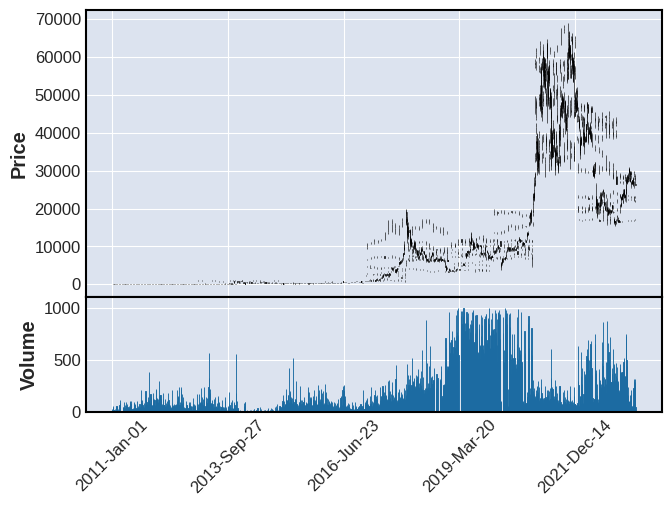

In [ ]:
# Filtrar os dados do começo de 2011 até janeiro de 2023
dados_filtrados = dados[(dados['Data'] >= '2011-01-01') & (dados['Data'] <= '2023-08-06')]

# Ordenar os dados pela coluna 'Data'
dados_filtrados = dados_filtrados.sort_values(by='Data')

# Converter os dados para o formato adequado para o mplfinance
dados_filtrados['Data'] = pd.to_datetime(dados_filtrados['Data'])
dados_filtrados.set_index('Data', inplace=True)

# Plotar o gráfico de velas
mpf.plot(dados_filtrados, type='candle', volume = True)

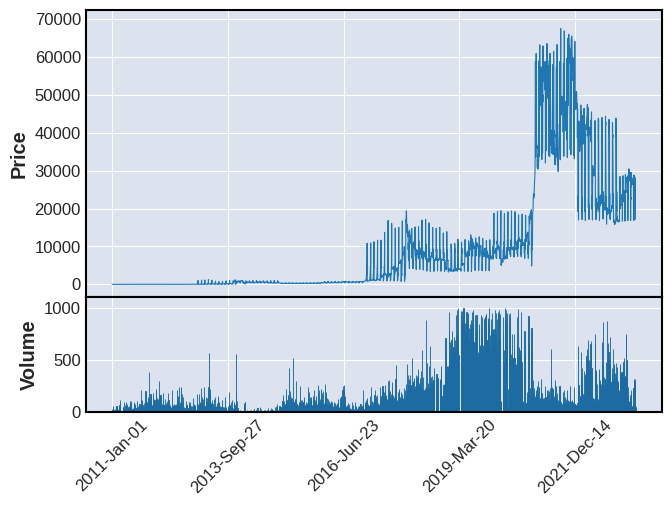

In [ ]:
#para melhor vizualização
mpf.plot(dados_filtrados, type='line', volume = True)

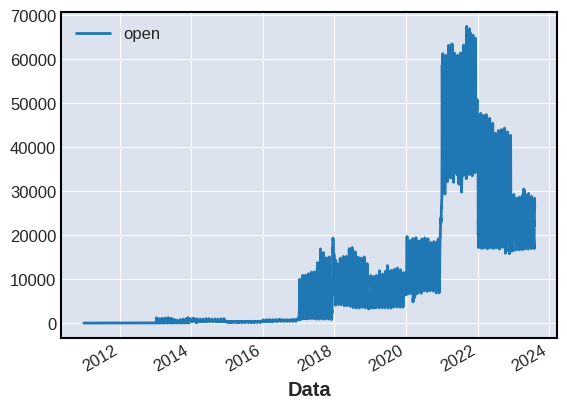

In [ ]:
#os dados da open pela data, os valores estão em dolar
dados_filtrados = dados[(dados['Data'] >= '2011-01-01') & (dados['Data'] <= '2023-08-06')]
dados_filtrados = dados_filtrados.sort_values(by='Data')
dados_filtrados.plot.line(x='Data', y='open')
plt.show()

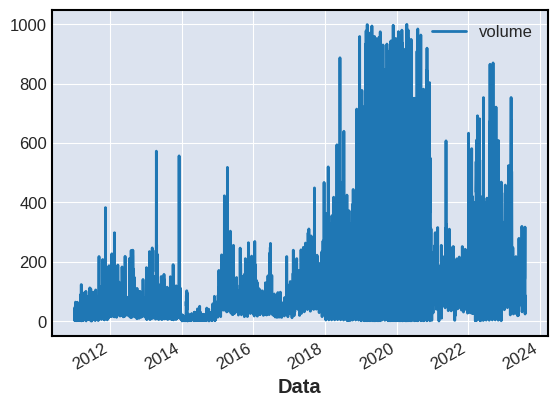

In [ ]:
#volume com o passar dos anos.
dados_filtrados = dados[(dados['Data'] >= '2011-01-01') & (dados['Data'] <= '2023-08-06')]
dados_filtrados = dados_filtrados.sort_values(by='Data')
dados_filtrados.plot.line(x='Data', y='volume')
plt.show()

<Axes: >

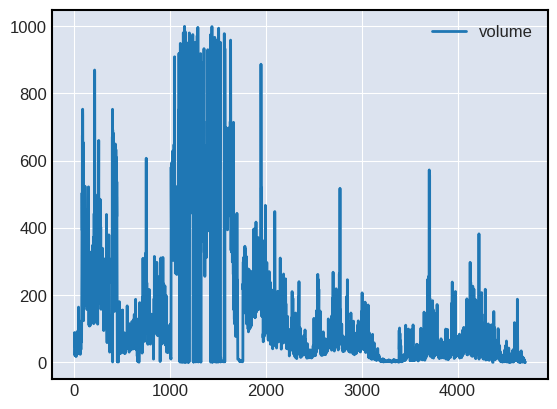

In [ ]:
dados[['volume']].plot()

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


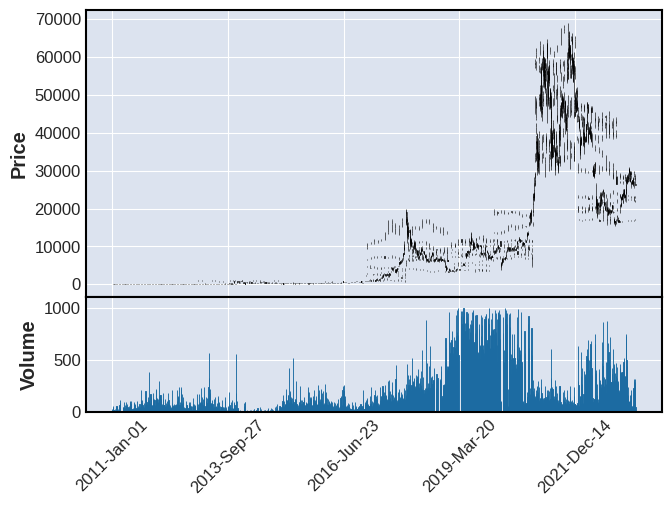

In [ ]:
# Filtrar os dados do começo de 2011 até janeiro de 2023
dados_filtrados1 = dados[(dados['Data'] >= '2011-01-01') & (dados['Data'] <= '2023-08-06')]

# Ordenar os dados pela coluna 'Data'
dados_filtrados1 = dados_filtrados1.sort_values(by='Var%')
dados_filtrados.set_index('Data', inplace=True)


# Plotar o gráfico de velas
mpf.plot(dados_filtrados, type='candle', volume = True)

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


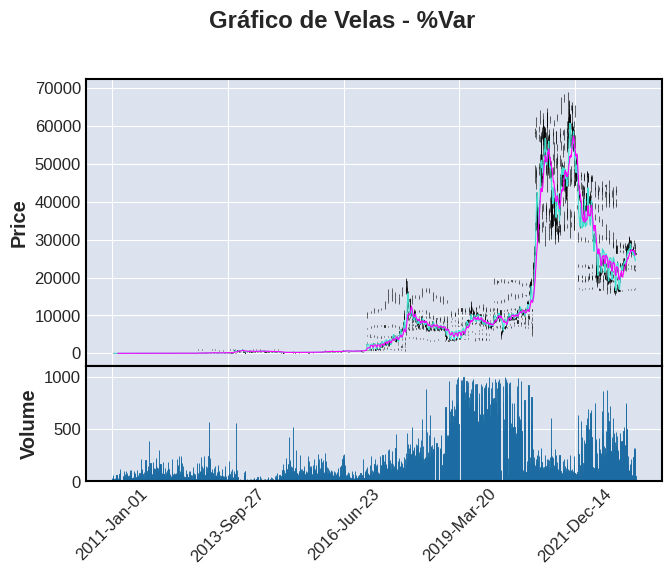

In [ ]:
dados_filtrados1 = dados[(dados['Data'] >= '2011-01-01') & (dados['Data'] <= '2023-08-06')]
dados_filtrados1 = dados_filtrados1.sort_values(by='Data')
dados_filtrados1.set_index('Data', inplace=True)

# Plotar o gráfico de velas usando a coluna "%Var"
mpf.plot(dados_filtrados1, type='candle', volume=True, mav=(20, 50), title='Gráfico de Velas - %Var')

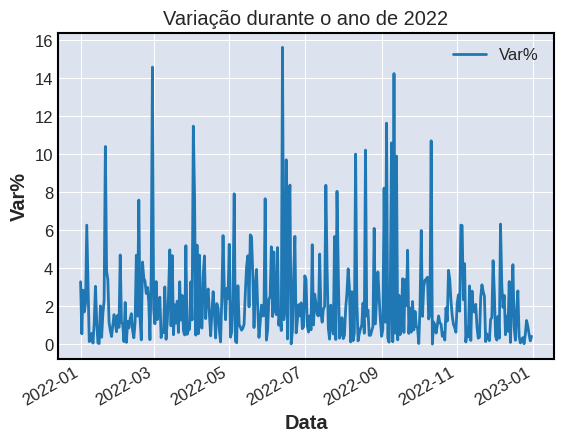

In [ ]:
#Variação durante o ano de 2022
dados_filtrados = dados.loc[(dados['Data'] >= '2022-01-01') & (dados['Data'] <= '2022-12-31')]
dados_filtrados.plot.line(x='Data', y='Var%')
plt.title('Variação durante o ano de 2022')
plt.xlabel('Data')
plt.ylabel('Var%')
plt.show()

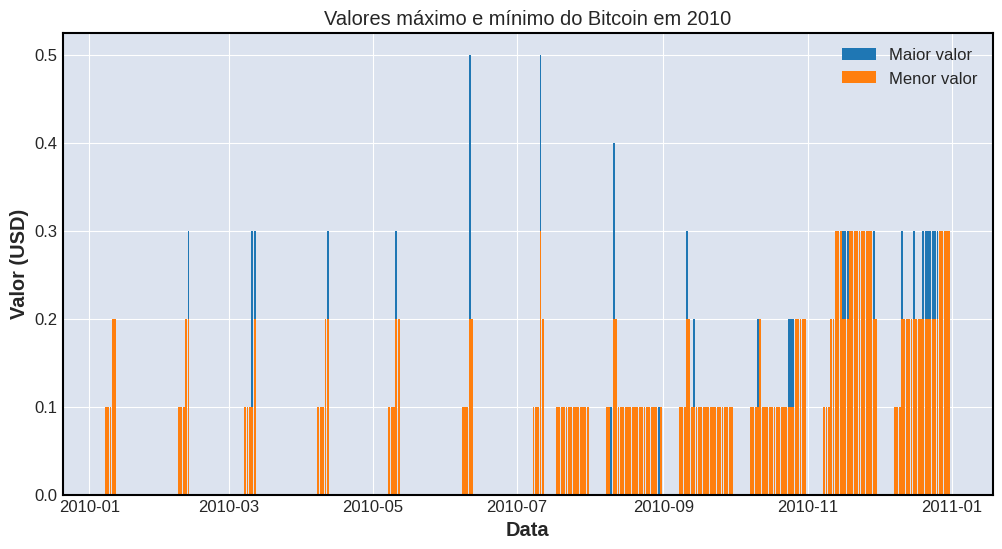

In [ ]:
df_2010 = dados[dados['Data'].dt.year == 2010]
df_2010_values = df_2010[['Data', 'high', 'low']]
plt.figure(figsize=(12, 6))
plt.bar(df_2010_values['Data'], df_2010_values['high'], label='Maior valor')
plt.bar(df_2010_values['Data'], df_2010_values['low'], label='Menor valor')
plt.title('Valores máximo e mínimo do Bitcoin em 2010')
plt.xlabel('Data')
plt.ylabel('Valor (USD)')
plt.legend()
plt.grid(True)
plt.show()

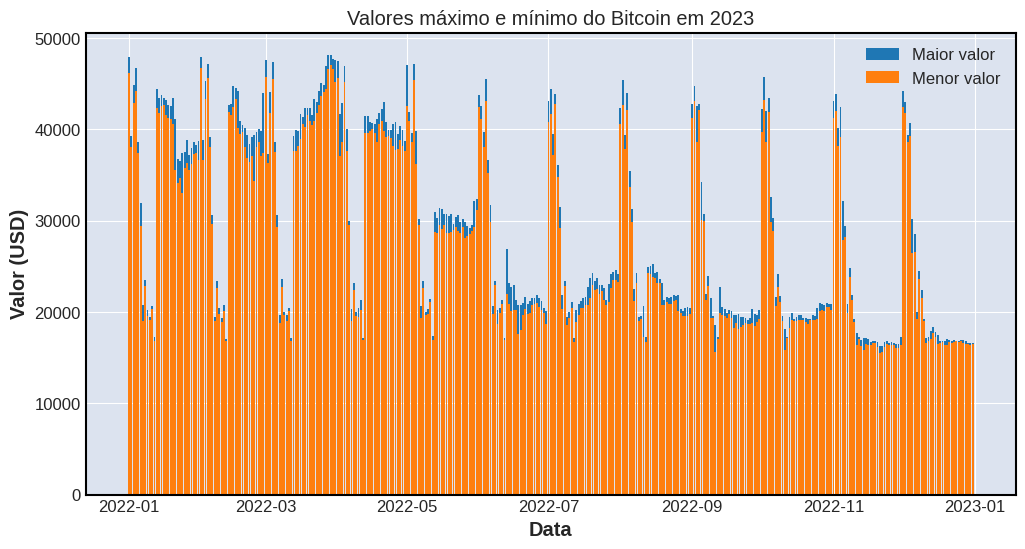

In [ ]:
df_2022 = dados[dados['Data'].dt.year == 2022]
df_2022_values = df_2022[['Data', 'high', 'low']]
plt.figure(figsize=(12, 6))
plt.bar(df_2022_values['Data'], df_2022_values['high'], label='Maior valor')
plt.bar(df_2022_values['Data'], df_2022_values['low'], label='Menor valor')
plt.title('Valores máximo e mínimo do Bitcoin em 2023')
plt.xlabel('Data')
plt.ylabel('Valor (USD)')
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='Data'>

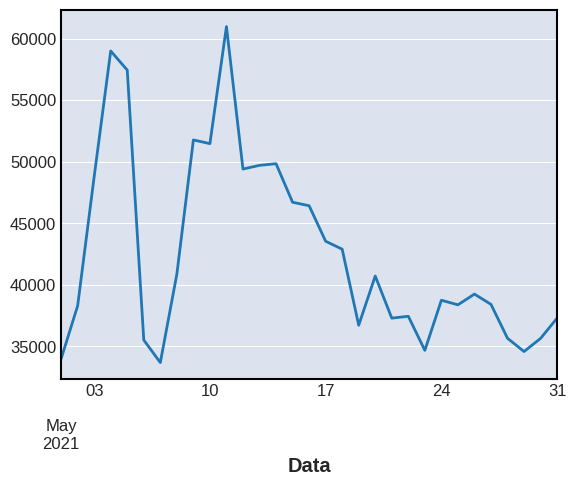

In [ ]:
#Dados do bitcoin quando o Elon Musk fez o Tweet em maio de 2021
dados.loc[(dados['Data'] >= '2021-05-01') & (dados['Data'] <= '2021-05-31')].groupby('Data')['close'].median().plot.line()

In [ ]:
# Converter o índice para um objeto do tipo DatetimeIndex
dados_aux.index = pd.to_datetime(dados_aux.index)

# Plotar o gráfico de candlestick com base na coluna "%Var" e o índice de data
mpf.plot(dados_aux, type='candle', style='yahoo', title='Gráfico de Candlestick - %Var', ylabel='%Var', mav=(20, 50), show_nontrading=False, xrotation=45)

NameError: ignored

In [ ]:
dfSemanal.iplot(kind='candle')